<a href="https://colab.research.google.com/github/mahankalisreeraj/AIML/blob/main/Movie_Reccommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MOVIE RECCOMMENDATION SYSTEM USING COLLABRATIVE FILTERING

**Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the csv file using pandas library

In [4]:
movies=pd.read_csv('netflix_data.csv')
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Pre processing analysis**

In [5]:
movies.info(verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


info() is used for summarizing the data frame.<br>
It includes column name,data type, also tells if the column contains any null value or not

In [6]:
movies.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


describe() is used to know about several statistical measures such as mean,median,standard deviation and many more..

In [7]:
movies.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

isnull().sum() is used to count the total number of null values

In [8]:
movies.shape

(8807, 12)

shape tells about the number of rows and columns

**Data Processing**

In [10]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

.columns is used to know about all the column names

In [11]:
new_data=movies[['show_id','title','listed_in','description']]
new_data

,show_id,title,listed_in,description
0,s1,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...
8802,s8803,Zodiac,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Zombieland,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Zoom,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
new_data.shape

(8807, 4)

shape is used to know about number of rows and columns

**Training the model**

In [43]:
from sklearn.model_selection import train_test_split
x=new_data['title']
y=new_data['listed_in']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

train_test_split is used to divide the data into training and testing data

In [31]:
x_train.shape,y_train.shape

((6164,), (6164,))

In [32]:
x_test.shape,y_test.shape

((2643,), (2643,))

These are done in order to make sure that both x and y train and test data is divided equally

In [117]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
x_train_encoded=label_encoder.fit_transform(y_train)
x_test_encoded=label_encoder.fit_transform(y_test)

for knn model the data must be in float values.So we used label encoder and encoded the values

In [118]:
y_test_encoded.shape,y_test.shape

((2643,), (2643,))

In [119]:
x_test_encoded.shape,x_test.shape

((2643,), (2643,))

This is done to make sure that after encoding also the data shape is unchanged

In [125]:
x_train_reshaped = x_train_encoded.reshape(-1, 1)
x_test_reshaped = x_test_encoded.reshape(-1, 1)

We should make sure thatthe x part of knn.fit() is in 2D array format.So we used reshape to do this one

In [121]:
#S2 Applying KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_reshaped,y_encoded)

KNeighborsClassifier(n_neighbors=3)

In [122]:
pred = knn.predict(x_test_reshaped)

**Evaluation of Data**

In [129]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test_encoded,pred)
print(conf_mat)

[[41  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0 24]]


This confusion matrix summarizes the performance of model on a set of test data.

In [126]:
print(classification_report(y_test_encoded,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        15
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       0.20      1.00      0.33         1
          14       0.00      0.00      0.00         4
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00        16
          17       0.14    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 This is the summary of the quality of classification made by the knn model

In [127]:
print('Misclassification Error Rate:',round(np.mean(pred!=y_test_encoded),3))

Misclassification Error Rate: 0.319


Another method to know about error is by plotting the k elbow graph

In [128]:
error_rate=[]
for i in range(1,90):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_reshaped,y_encoded)
  pred_i=knn.predict(x_test_reshaped)
  error_rate.append(np.mean(pred_i!=y_test_encoded))

Text(0, 0.5, 'Error(Misclassification) Rate')

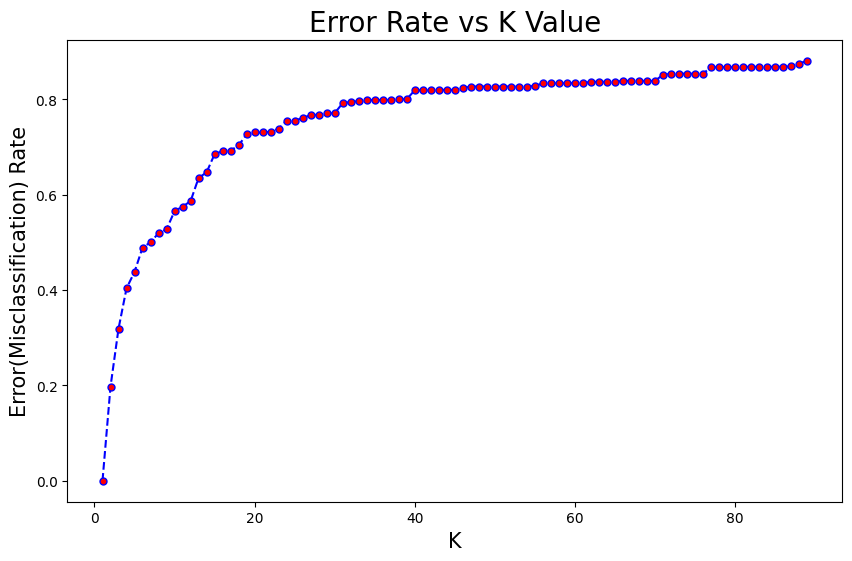

In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(1,90),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error Rate vs K Value',fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error(Misclassification) Rate',fontsize=15)